In [ ]:
# Elaborated based on the wonderful tutorial by Data Science Tutorials (https://youtu.be/NPznsxeL3FM)

In [1]:
import numpy as np
import pandas as pd
import plotly.offline as pyo
import matplotlib.pyplot as plt

In [2]:
# Read the most up-to-date dataset directly from the WHO website
url = 'https://covid19.who.int/WHO-COVID-19-global-data.csv'
data = pd.read_csv(url)

In [3]:
data.head(10)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0
5,2020-01-08,AF,Afghanistan,EMRO,0,0,0,0
6,2020-01-09,AF,Afghanistan,EMRO,0,0,0,0
7,2020-01-10,AF,Afghanistan,EMRO,0,0,0,0
8,2020-01-11,AF,Afghanistan,EMRO,0,0,0,0
9,2020-01-12,AF,Afghanistan,EMRO,0,0,0,0


In [8]:
data_FI = data[data.Country_code == 'FI']
data_FI.head(10)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
25740,2020-01-03,FI,Finland,EURO,0,0,0,0
25741,2020-01-04,FI,Finland,EURO,0,0,0,0
25742,2020-01-05,FI,Finland,EURO,0,0,0,0
25743,2020-01-06,FI,Finland,EURO,0,0,0,0
25744,2020-01-07,FI,Finland,EURO,0,0,0,0
25745,2020-01-08,FI,Finland,EURO,0,0,0,0
25746,2020-01-09,FI,Finland,EURO,0,0,0,0
25747,2020-01-10,FI,Finland,EURO,0,0,0,0
25748,2020-01-11,FI,Finland,EURO,0,0,0,0
25749,2020-01-12,FI,Finland,EURO,0,0,0,0


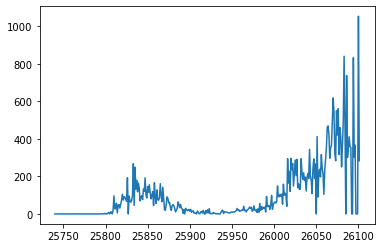

In [5]:
# First plot with matplotlib
plt.plot(data_FI.New_cases)
plt.show()

In [6]:
# Plot the same graph with Plotly
pyo.plot([{
    'x' : data_FI.index,
    'y' : data_FI.New_cases
}])

'temp-plot.html'

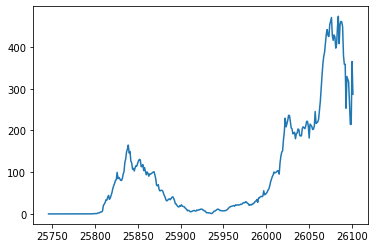

In [36]:
# Calculate a 7-day rolling average
data_FI_MA = data_FI.assign(MA = lambda x: data_FI.New_cases.rolling(window = 7).mean())
data_FI_MA

plt.plot(data_FI_MA.MA)
plt.show()

In [37]:
# Plot both the number of new cases and the 7-day rolling average
data_FI_MA = data_FI_MA[['Date_reported', 'New_cases', 'MA']]
data_FI_MA.set_index('Date_reported', inplace = True)
data_FI_MA

,New_cases,MA
Date_reported,,
2020-01-03,0,NaN
2020-01-04,0,NaN
2020-01-05,0,NaN
2020-01-06,0,NaN
2020-01-07,0,NaN
...,...,...
2020-12-25,0,265.142857
2020-12-26,0,214.571429
2020-12-27,0,214.571429


In [38]:
pyo.plot([{
    'x' : data_FI_MA.index,
    'y' : data_FI_MA[col],
    'name' : col
} for col in data_FI_MA.columns])

'temp-plot.html'